# 答题卡识别

In [1]:
import numpy as np
import cv2

import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Allow image embeding in notebook
%matplotlib inline

In [58]:
def showImg(img, x=20, y=30):
    fig = plt.figure(figsize=(x, y))
    plt.imshow(img, cmap ='gray')
    plt.axis('off')

### 函数

## 一、切割答题区域
### 1、读入图片+预处理

(-0.5, 1394.5, 231.5, -0.5)

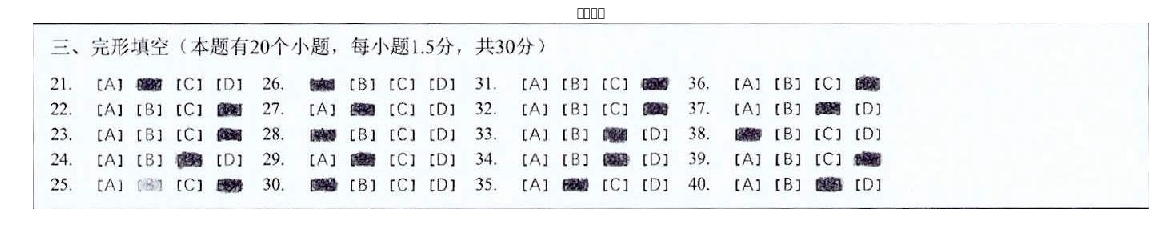

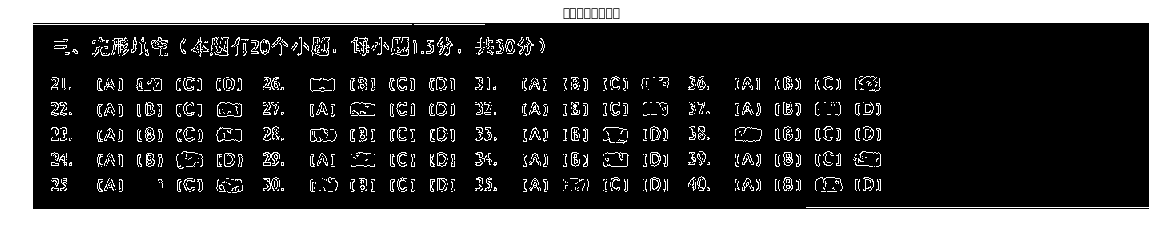

In [33]:
from imutils import auto_canny, contours

# 【1】读入图片+预处理
image = cv2.imread('sub_answer_card_3.jpg')# 加载图片
# cv2.imshow("Original", image)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)# 转灰度
blurred = cv2.GaussianBlur(gray, (5, 5), 0)# 高斯模糊

# kernel = np.ones((3, 3), np.uint8)
# blurred = cv2.erode(blurred, kernel, iterations=1) #腐蚀
# blurred = cv2.dilate(blurred, kernel, iterations=2) #膨胀
# blurred = cv2.erode(blurred, kernel, iterations=1) #腐蚀
# blurred = cv2.dilate(blurred, kernel, iterations=2) #膨胀

# edged = cv2.Canny(blurred, 75, 200)# 边缘检测
edged = auto_canny(blurred) # 边缘检测

# fig = plt.figure(figsize=(15, 10))
# plt.subplot(1, 2, 1)
# plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))#plt显示是RGB顺序
# plt.axis('off')
# plt.subplot(1, 2, 2)
# plt.imshow(edged,cmap ='gray')
# plt.axis('off')

fig = plt.figure(figsize=(20, 30))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title(u"原始图片")
plt.axis('off')

fig = plt.figure(figsize=(20, 30))
plt.imshow(edged, cmap ='gray')
plt.title(u"边缘检测后的图片")
plt.axis('off')

#  黑底白字  白底黑字

(-0.5, 1394.5, 231.5, -0.5)

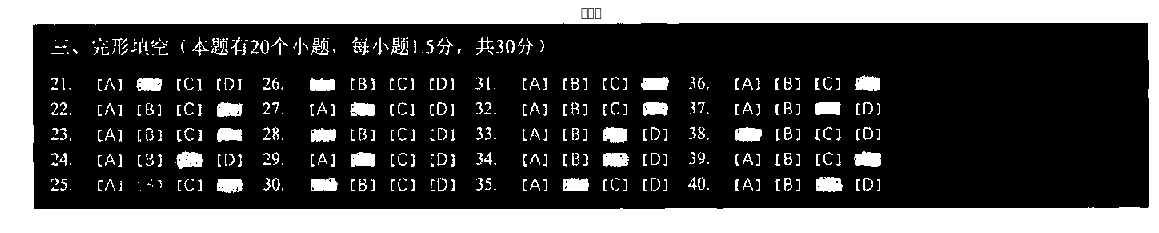

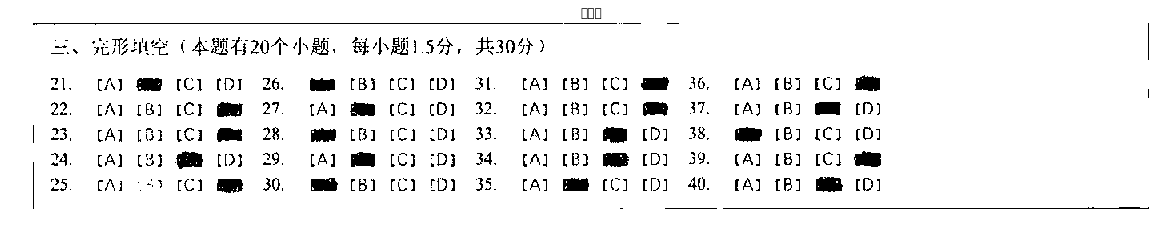

In [3]:
# 黑底白字
thresh_option_answer = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
fig = plt.figure(figsize=(20, 30))
plt.imshow(thresh_option_answer, cmap ='gray')
plt.title(u'二值图')
plt.axis('off')


# 白底黑字
ret, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
fig = plt.figure(figsize=(20, 30))
plt.imshow(binary, cmap ='gray')
plt.title(u'二值图')
plt.axis('off')

In [144]:
import cv2
from cnocr import CnOcr
ocr = CnOcr()

RuntimeError: crnn1_seq-fc_bias is not presented

# 验证pytesseract的数字识别结果

ocr: [''] ===
['5', '.']


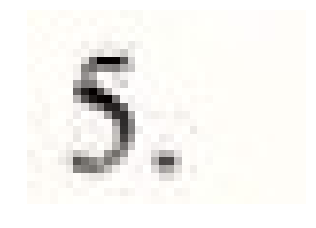

In [170]:
import pytesseract
from pytesseract import Output

# for i in range(1,10) :
image = cv2.imread('111.jpg')# 加载图片
# image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)# 转灰度
# # ret, image = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
# image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

# # kernel = np.ones((2, 2), np.uint8)
# # dilate_choice_answer = cv2.dilate(binary, kernel, iterations=1) 
# # dilate_choice_answer = cv2.erode(binary, kernel, iterations=1) 

fig = plt.figure(figsize=(5, 10))
plt.imshow(image, cmap ='gray')
plt.axis('off')

dd = pytesseract.image_to_data(image, output_type=Output.DICT, lang='chi_sim')
print('ocr:', dd['text'] , '===')

res = ocr.ocr_for_single_line(image)
print(res)


['', '', '', '', '4.', '[A', '[B]', 'mM', 'D1', '9', '[A]', '(B]', '[C)', 'em', '14', '@e', '[B1', '[C1', '[D]', '', 'oe', '(li', 'Tord)', '10.', '@', '(B)', '[C1', 'ID]', '1S', 'ps', '[81', '101', '[21', '', '', '', '']
['', '', '', '', '4.', '(Al', '(61', 'sa', '(D2', '9.', '(A)', '(8)', '(C)', 'Si', '14.', 'ae', 'PB', '6C1', 'Tb)', '', 'ame', '(l::', '1D)', 'FO.', 'iP', 'TB)', 'ECT', '(DI', '1S.', 'Bi', '682', '161', '601', '', '', '', '']
['', '', '', '', '4.', '(Al', '(61', 'sa', '(D2', '9.', '(A)', '(8)', '(C)', 'Si', '14.', 'ae', 'PB', '6C1', 'Tb)', '', 'ame', '(l::', '1D)', 'FO.', 'iP', 'TB)', 'ECT', '(DI', '1S.', 'Bi', '682', '161', '601', '', '', '', '']


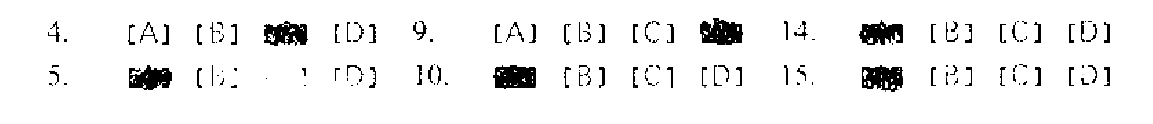

In [56]:
import pytesseract
from PIL import ImageEnhance
from PIL import Image
from pytesseract import Output

# img = cv2.imread('20210625171030.jpg')# 加载图片
img = Image.open('20210625172118.png')
img = img.convert('RGB')  #这里也可以尝试使用L
enhancer = ImageEnhance.Color(img)
enhancer = enhancer.enhance(0)
enhancer = ImageEnhance.Brightness(enhancer)
enhancer = enhancer.enhance(2)
enhancer = ImageEnhance.Contrast(enhancer)
enhancer = enhancer.enhance(8)
enhancer = ImageEnhance.Sharpness(enhancer)
img = enhancer.enhance(20)
fig = plt.figure(figsize=(20, 30))
plt.imshow(img, cmap ='gray')
plt.axis('off')

dd = pytesseract.image_to_data(img, output_type=Output.DICT, lang = 'eng1')
print(dd['text'])

dd = pytesseract.image_to_data(img, output_type=Output.DICT, lang = 'eng')
print(dd['text'])

dd = pytesseract.image_to_data(img, output_type=Output.DICT)
print(dd['text'])

---------------------------------------------------------------------

## 二、选择题自动批改
### 2、提取选择题候选区域

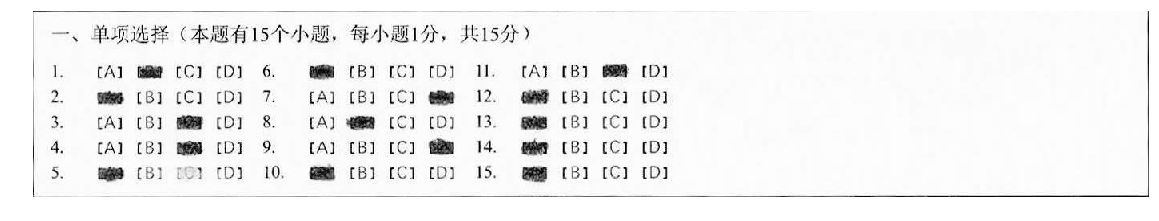

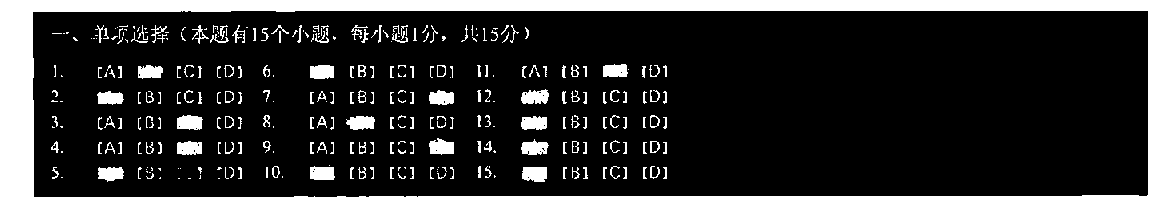

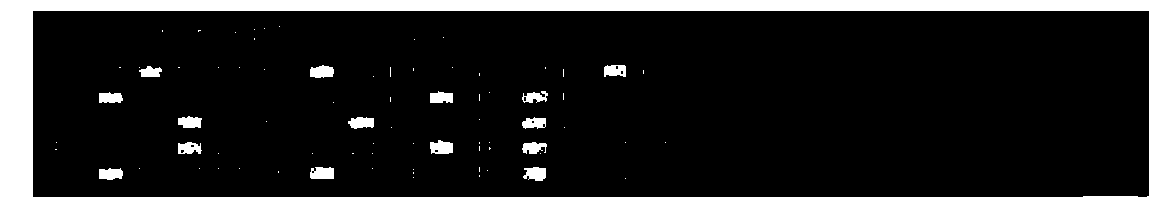

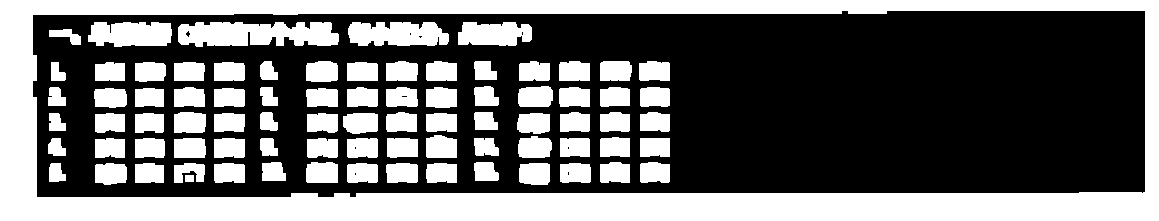

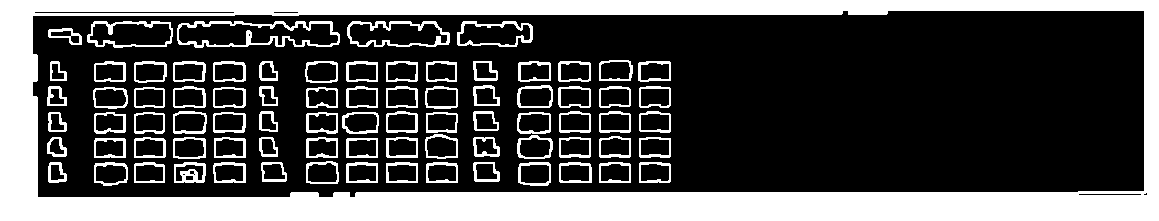

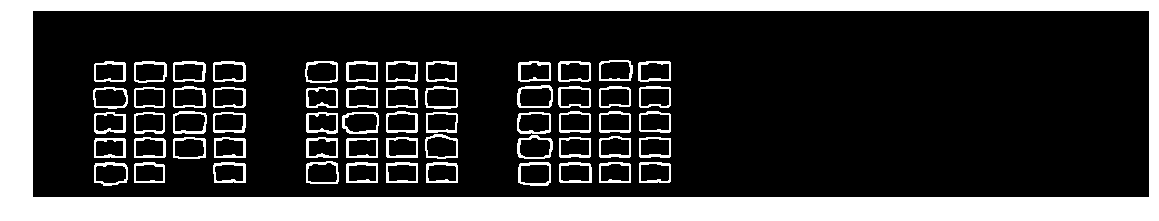

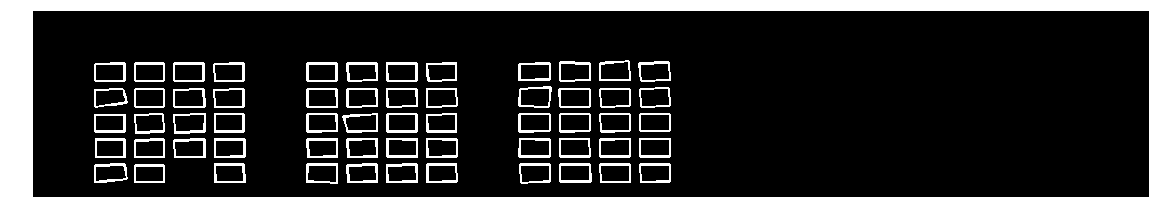

In [61]:
image = cv2.imread('sub_answer_card_1.jpg')# 加载图片
# cv2.imshow("Original", image)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)# 转灰度
showImg(gray)

# OTSU二值化（黑底白字）
thresh_option_answer = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
showImg(thresh_option_answer)


kernel = np.ones((3, 3), np.uint8)
dilate_choice_answer = cv2.erode(thresh_option_answer, kernel, iterations=1) 
showImg(dilate_choice_answer)


# 2、针对黑底白字的高亮部分膨胀
# 因为候选区域由三部分组成（左括号、右括号、大写的英文字母），通过膨胀将三个区域连成一片
kernel = np.ones((9, 9), np.uint8)
dilate_choice_answer = cv2.dilate(thresh_option_answer, kernel, iterations=1) 
showImg(dilate_choice_answer)


# 3、提取膨胀后的轮廓
dilate_option_cnts, _ = cv2.findContours(dilate_choice_answer.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
black_background = np.ones(gray.shape,np.uint8)*0
cv2.drawContours(black_background, dilate_option_cnts, -1, (3,240,240), 2)
showImg(black_background)

# # 4、筛选轮廓中的选择题候选项
choiceAnswerCnts = [] # 初始化选择题候选区域
choiceAnswerCnts1 = [] # 初始化选择题候选区域
for c in dilate_option_cnts:

    peri = cv2.arcLength(c, True)
    area = cv2.contourArea(c)
    approx = cv2.approxPolyDP(c, 0.1 * peri, True)
    # 计算轮廓的边界框
    (x, y, w, h) = cv2.boundingRect(approx) 
    # 计算宽高比
    ar = w / float(h)
    
    # 筛选轮廓为四边形的目前轮廓
#     if len(approx) == 4850
    if y >= 60 and w >= 20 and w <= 60 and ar >= 1 and ar <= 2 and area > 700:
#     if  w >= 35 and w <= 60  and ar >= 1.2 and ar <= 2:
#             print('坐标: ', (x, y, w, h))
#         print(area)
        choiceAnswerCnts.append(c)
        choiceAnswerCnts1.append(approx)
        
# 5、绘制筛选出来的候选项
# print(warped_option_answer.shape)
# print(choiceAnswerCnts[0].shape)
black_background = np.ones(gray.shape,np.uint8)*0
cv2.drawContours(black_background, choiceAnswerCnts, -1, (3,240,240), 2)
showImg(black_background)

black_background = np.ones(gray.shape,np.uint8)*0
cv2.drawContours(black_background, choiceAnswerCnts1, -1, (3,240,240), 2)
showImg(black_background)


# 候选框、答案、题序最新识别方案

20
['2', '0', '.']
['1', '5', '.']
['1', '0', '.']
['5', '.']
['1', '9', '.']
['1', '4', '.']
['9', '.']
['4', '.']
['1', '8', '.']
['1', '3', '.']
['8', '.']
['3', '.']
['1', '7', '.']
['1', '2', '.']
['7', '.']
['2', '.']
['1', '6', '.']
['1', '1', '.']
['6', '.']
['1', '.']


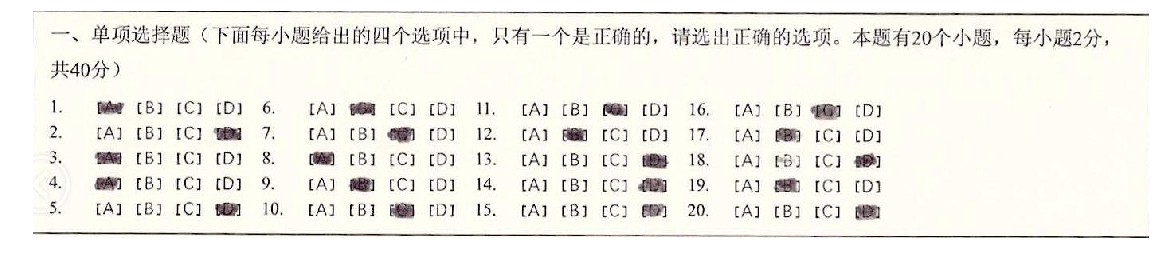

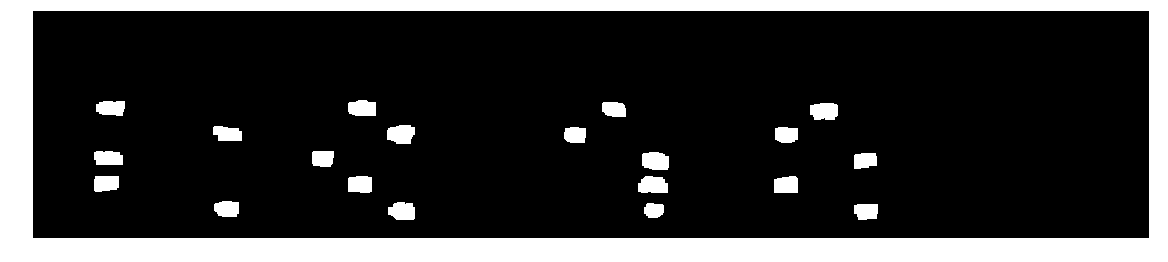

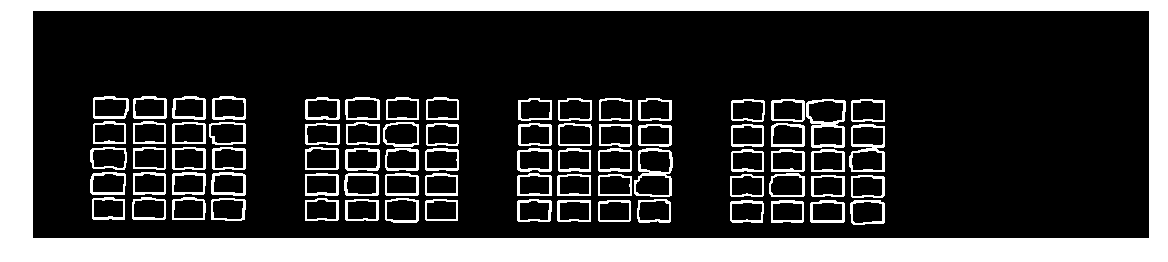

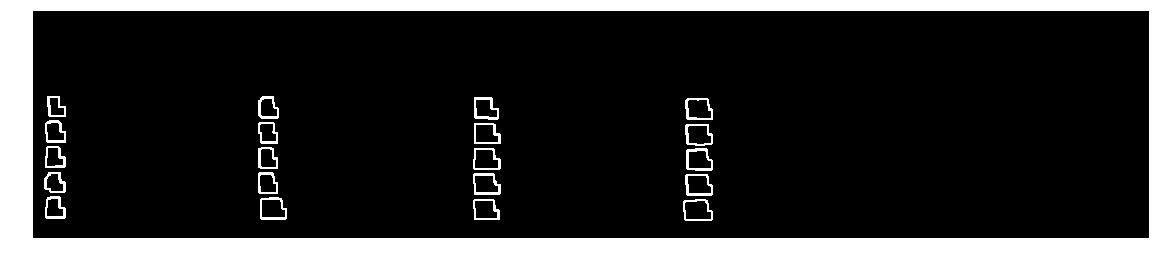

In [217]:
img = cv2.imread('20210628085539.jpg')
showImg(img)
# 转灰度
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# OTSU二值化（黑底白字）
thresh_img = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
# 腐蚀
kernel = np.ones((5, 5), np.uint8)
erode_img = cv2.erode(thresh_img, kernel, iterations=1) 
# 膨胀
kernel = np.ones((9, 9), np.uint8)
dilate_img = cv2.dilate(erode_img, kernel, iterations=1) 
showImg(dilate_img)
# 显示图片
# showImg(dilate_choice_answer)

# 寻找轮廓
answer_cnts, _ = cv2.findContours(dilate_img.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
black_background = np.ones(gray.shape,np.uint8)*0
cv2.drawContours(black_background, answer_cnts, -1, (3,240,240), 2)
# showImg(black_background)

# 获取检测到的所有答案框的中点的x轴坐标
answer_option_center_x = []
for cnt in answer_cnts:
    (x, y, w, h) = cv2.boundingRect(cnt)
    answer_option_center_x.append((2*x+w)/2)
#     print((x, y, w, h))
# print(answer_option_center_x)

# 获取检测到的所有选项框的中点的x轴坐标
choice_option_center_x = []
ocr_reslut = pytesseract.image_to_data(img, output_type=Output.DICT, lang='chi_sim')
# print(ocr_reslut['text'])
for i in range(len(ocr_reslut['text'])):
    text_i = ocr_reslut['text'][i]
    (x, y, w, h) = (ocr_reslut['left'][i], ocr_reslut['top'][i], ocr_reslut['width'][i], ocr_reslut['height'][i])
    if y > 60 and ('A' in text_i or 'B' in text_i or 'C' in text_i or 'D' in text_i):
        choice_option_center_x.append((2*x+w)/2)
#         print((x, y, w, h))

# print(len(choice_option_center_x))
all_option_center_x = answer_option_center_x + choice_option_center_x

# OTSU二值化（黑底白字）
thresh_img = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
# 膨胀
kernel = np.ones((11, 11), np.uint8)
dilate_img = cv2.dilate(thresh_img, kernel, iterations=1) 
# showImg(dilate_img)

# 寻找轮廓
option_cnts, _ = cv2.findContours(dilate_img.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
black_background = np.ones(gray.shape,np.uint8)*0
cv2.drawContours(black_background, option_cnts, -1, (3,240,240), 2)
# showImg(black_background)


def is_choice_option(x, w, all_option_center_x):
    for center_x in all_option_center_x:
        if center_x > x and center_x < x + w:
            return True
    return False

# # 4、筛选轮廓中的选择题候选项
choiceAnswerCnts = [] # 初始化选择题候选区域
questionNumberCnts = []
for c in option_cnts:
    peri = cv2.arcLength(c, True)
    area = cv2.contourArea(c)
    approx = cv2.approxPolyDP(c, 0.1 * peri, True)
    (x, y, w, h) = cv2.boundingRect(approx) 
    ar = h / float(w)
    
    # 筛选轮廓为四边形的目前轮廓
#     if y >= 60 and w >= 20 and w <= 60 and ar >= 1 and ar <= 2 and area > 700:
    if y >= 60 and ar > 0.5 and ar < 2:
        if is_choice_option(x, w, all_option_center_x) and area > 400:
            choiceAnswerCnts.append(c)
        elif not is_choice_option(x, w, all_option_center_x) and area > 100:
#             print('area', area)
            questionNumberCnts.append(c)

black_background = np.ones(gray.shape,np.uint8)*0
cv2.drawContours(black_background, choiceAnswerCnts, -1, (3,240,240), 2)
showImg(black_background)

black_background = np.ones(gray.shape,np.uint8)*0
cv2.drawContours(black_background, questionNumberCnts, -1, (3,240,240), 2)
showImg(black_background)

print(len(questionNumberCnts))
for question_number_cnt in questionNumberCnts:
    peri = cv2.arcLength(question_number_cnt, True)
    approx = cv2.approxPolyDP(question_number_cnt, 0.1 * peri, True)
    # 计算轮廓的边界框
    (x, y, w, h) = cv2.boundingRect(approx) 
    res = ocr.ocr_for_single_line(gray[y:y + h, x:x + w])
    print(res)